In [102]:
# inmprting the necessay libraries
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import factorial
from scipy.stats import poisson
from sklearn import metrics

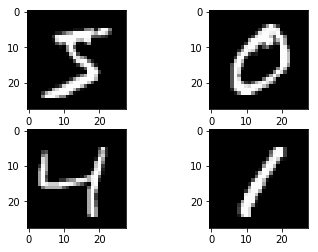

In [2]:
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
y_test.shape

(10000,)

In [7]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]

In [8]:
num_pixels

784

In [9]:
#Reshaping X_train and X_test
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

In [10]:
X_test.shape

(10000, 784)

In [16]:
# for the number 0 calculating the the avg. value for each pixel
avg0 =[]
for i in range (0,784):
    avg0.append(sum(X_train[y_train ==0,i])/(len(X_train[y_train ==0,i])))
    

In [18]:
# for the number 1 calculating the the avg. value for each pixel
avg1 =[]
for i in range (0,784):
    avg1.append(sum(X_train[y_train ==1,i])/(len(X_train[y_train ==1,i])))

In [19]:
# for the number 2 calculating the the avg. value for each pixel
avg2 =[]
for i in range (0,784):
    avg2.append(sum(X_train[y_train ==2,i])/(len(X_train[y_train ==2,i])))

In [20]:
# for the number 3 calculating the the avg. value for each pixel
avg3 =[]
for i in range (0,784):
    avg3.append(sum(X_train[y_train ==3,i])/(len(X_train[y_train ==3,i])))

In [21]:
# for the number 4 calculating the the avg. value for each pixel
avg4 =[]
for i in range (0,784):
    avg4.append(sum(X_train[y_train ==4,i])/(len(X_train[y_train ==4,i])))

In [22]:
# for the number 5 calculating the the avg. value for each pixel
avg5 =[]
for i in range (0,784):
    avg5.append(sum(X_train[y_train ==5,i])/(len(X_train[y_train ==5,i])))

In [23]:
# for the number 6 calculating the the avg. value for each pixel
avg6 =[]
for i in range (0,784):
    avg6.append(sum(X_train[y_train ==6,i])/(len(X_train[y_train ==6,i])))

In [24]:
# for the number 7 calculating the the avg. value for each pixel
avg7 =[]
for i in range (0,784):
    avg7.append(sum(X_train[y_train ==7,i])/(len(X_train[y_train ==7,i])))

In [25]:
# for the number 8 calculating the the avg. value for each pixel
avg8 =[]
for i in range (0,784):
    avg8.append(sum(X_train[y_train ==8,i])/(len(X_train[y_train ==8,i])))

In [26]:
# for the number 9 calculating the the avg. value for each pixel
avg9 =[]
for i in range (0,784):
    avg9.append(sum(X_train[y_train ==9,i])/(len(X_train[y_train ==9,i])))

In [29]:
# putting the avg values for each number into a single array
avg = np.array([avg0,avg1,avg2,avg3,avg4,avg5,avg6,avg7,avg8,avg9])
avg.shape

(10, 784)

In [90]:
#predicting a number using poissons distribution for a given input
X_predicted =[]
for j in range(0,len(X_test)):
    
    a1 =np.zeros(shape=(10,1))
    
    for i in range (0,10):
        dist = poisson(avg[i])
        a1[i]=sum(np.log(dist.pmf(X_test[j]) +1e-250))

    b =list(a1)
    
    X_predicted.append(b.index(max(a1)))


In [93]:
X_predicted = np.array(X_predicted)

In [94]:
X_predicted.shape

(10000,)

In [100]:
#Calulating the accuracy
count =0
for k in range(0,len(X_predicted)):
    
    if X_predicted[k]== y_test[k]:
        count = count +1
        
print("Accuracy is",(count/10000)*100, "%")        

Accuracy is 82.57 %


In [101]:
#Confusion matrix
print(metrics.confusion_matrix(y_test,X_predicted))

[[ 879    0    3    6    0   38   20    1   32    1]
 [   0 1086    4    3    0    5    4    0   32    1]
 [  18   43  814   23   17    4   40   16   55    2]
 [   5   28   36  823    1   20   11   11   45   30]
 [   3   10    4    0  733    0   22    1   22  187]
 [  19   34    4   94   25  615   17   10   37   37]
 [  19   27   13    0   17   25  845    0   11    1]
 [   2   39   13    3   16    0    1  855   29   70]
 [  11   50   12   56   14   20    9    7  751   44]
 [  11   20    4    8   65    5    1   15   24  856]]
